In [159]:
#!pip install yfinance
#!pip install pandas_ta

import yfinance as yf
import pandas as pd
import random
import matplotlib.pyplot as plt
import pandas_ta as ta


In [160]:
dfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
list_of_stocks = dfs[0].Symbol
list_of_stocks.head()

0     MMM
1     AOS
2     ABT
3    ABBV
4    ABMD
Name: Symbol, dtype: object

In [161]:
len(list_of_stocks)

505

In [162]:
ticker = random.choice(list_of_stocks)
ticker

'TDG'

In [163]:
stock = yf.Ticker(ticker)
stock.history().head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-09,615.270020,639.020020,611.609985,633.929993,406600,0,0
2022-03-10,620.330017,647.469971,620.330017,633.679993,315200,0,0
2022-03-11,638.539978,646.919983,623.270020,623.989990,292600,0,0


In [164]:
stock.history().isna().sum().sum()

0

In [165]:
stock.earnings

,Revenue,Earnings
Year,,
2018,3811000000,957000000
2019,5223000000,890000000
2020,5103000000,699000000
2021,4798000000,680000000


In [166]:
stock_name = stock.info['longName']

In [167]:
period = "1y"
interval = "1d"
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
# Exceptions!!!!!!!!
stock_price = stock.history(period=period,interval=interval).drop(['Stock Splits', 'Dividends'], axis=1)

#stock_price = stock.history().Close
#stock_volume = stock.history(period=period,interval=interval).Volume


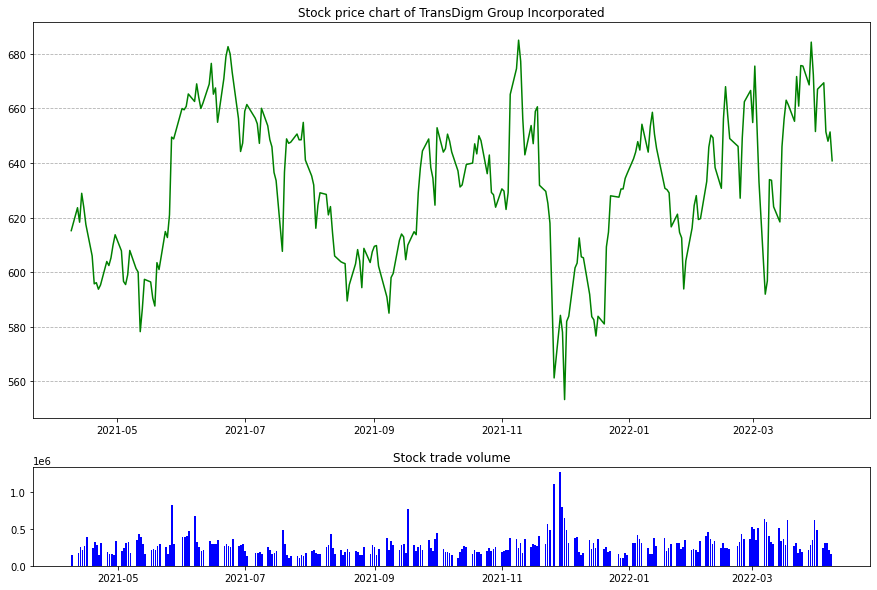

In [232]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10), gridspec_kw={'height_ratios': [4, 1]})
ax1.set(title="Stock price chart of "+stock_name)
ax1.plot(stock_price.index, stock_price.Close, color="g")
ax1.grid(axis='y', ls='--')
ax2.set(title="Stock trade volume")
ax2.bar(stock_price.index, stock_price.Volume, color="blue")
plt.show()

In [169]:
sma_range = [10,30,100]
for sma in sma_range:
  stock_price[f'SMA_{sma}'] = stock_price['Close'].rolling(sma).mean()

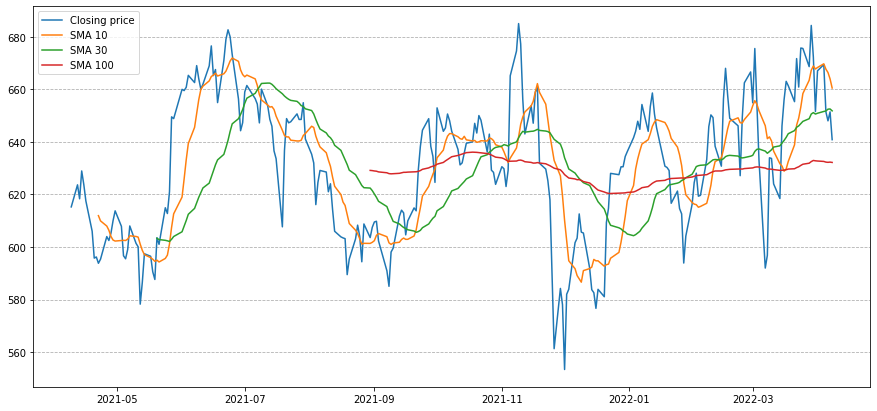

In [233]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(stock_price.index, stock_price.Close, label="Closing price")
for sma in sma_range:
  ax.plot(stock_price.index, stock_price[f'SMA_{sma}'], label=f"SMA {sma}")
ax.grid(axis='y', ls='--')
plt.legend(loc="upper left")
plt.show()

In [171]:
ewma_range = [10,30,100]
for ewma in ewma_range:
  stock_price[f'EWMA_{ewma}'] = stock_price['Close'].ewm(span=ewma, adjust=False).mean()

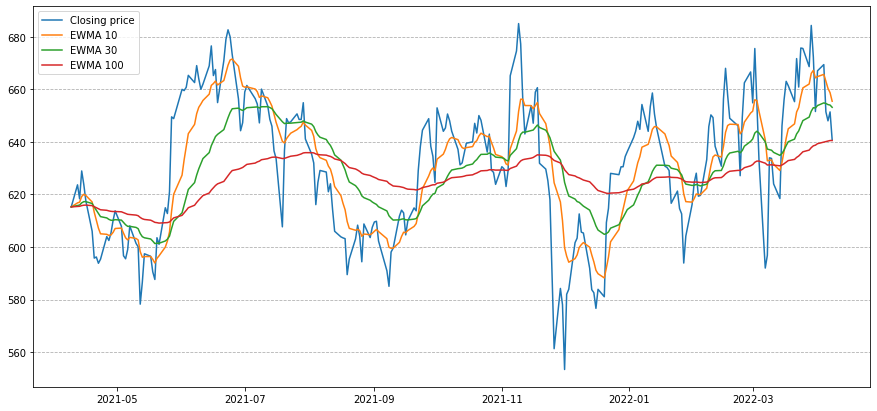

In [234]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(stock_price.index, stock_price.Close, label="Closing price")

for ewma in ewma_range:
  ax.plot(stock_price.index, stock_price[f'EWMA_{ewma}'], label=f"EWMA {ewma}")

ax.grid(axis='y', ls='--')
plt.legend(loc="upper left")
plt.show()

In [173]:
stock_price.head()

,Open,High,Low,Close,Volume,SMA_10,SMA_30,SMA_100,EWMA_10,EWMA_30,EWMA_100
Date,,,,,,,,,,,
2021-04-09,614.429993,615.559998,607.599976,615.239990,139600,NaN,NaN,NaN,615.239990,615.239990,615.239990
2021-04-12,613.450012,623.650024,611.000000,623.640015,171100,NaN,NaN,NaN,616.767267,615.781927,615.406327
2021-04-13,618.989990,625.570007,613.340027,618.330017,259800,NaN,NaN,NaN,617.051404,615.946320,615.464222
2021-04-14,621.270020,633.039978,615.760010,628.919983,218100,NaN,NaN,NaN,619.209327,616.783331,615.730673
2021-04-15,629.849976,629.849976,619.109985,623.789978,270100,NaN,NaN,NaN,620.042173,617.235372,615.890263


In [174]:
stock_price['RSI_14']=ta.rsi(stock_price['Close'],lenght=14)

In [175]:
hor70=[70 for price in stock_price['RSI_14']]
hor30=[30 for price in stock_price['RSI_14']]

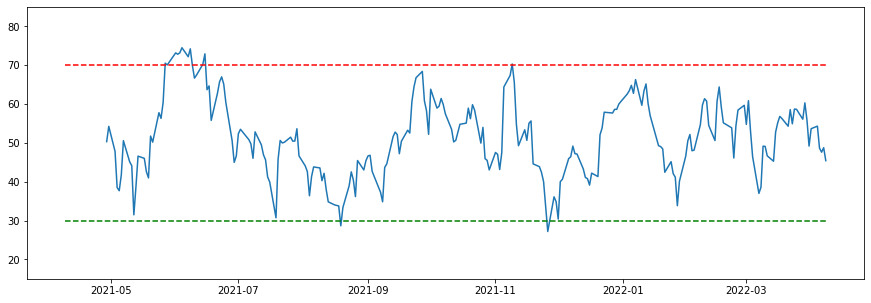

In [236]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(stock_price.index, stock_price['RSI_14'])
ax.plot(stock_price.index, hor70, ls='--',c='r')
ax.plot(stock_price.index, hor30, ls='--',c='g')
plt.ylim(15,85)

plt.show()

In [177]:
stock_price.ta.indicators()


Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [178]:
MACD = ta.macd(stock_price['Close'],fast=12, slow=26, signal=9)
stock_price = pd.concat([stock_price,MACD],axis=1)

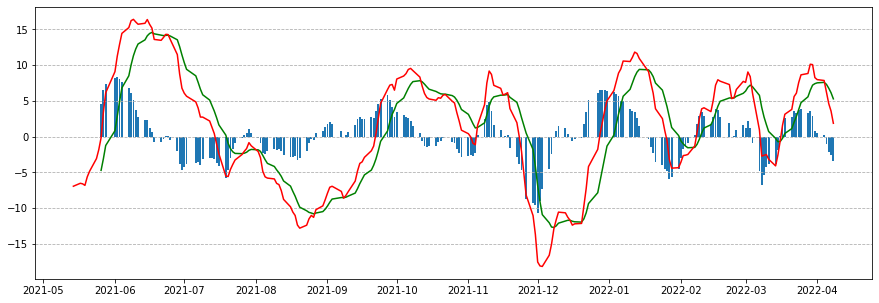

In [237]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(stock_price.index, stock_price['MACDh_12_26_9'])
ax.plot(stock_price.index, stock_price['MACDs_12_26_9'],c='g')
ax.plot(stock_price.index, stock_price['MACD_12_26_9'],c='r')
ax.grid(axis='y', ls='--')

plt.show()

In [186]:
STOCH = ta.stoch(high=stock_price.High,low=stock_price.Low,close=stock_price.Close)
stock_price = pd.concat([stock_price, STOCH], axis=1)

In [194]:
hor80=[80 for price in stock_price['STOCHd_14_3_3']]
hor20=[20 for price in stock_price['STOCHd_14_3_3']]

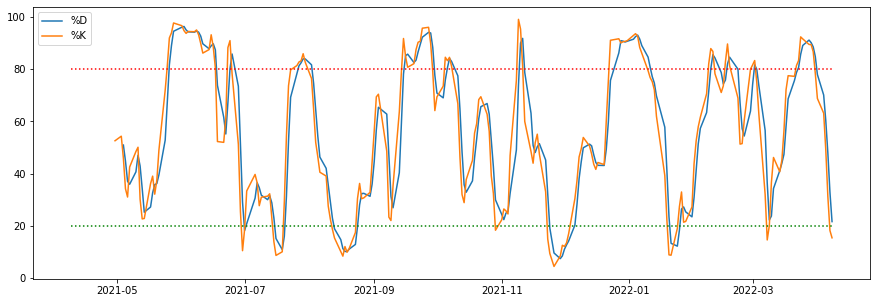

In [196]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(stock_price.index, stock_price['STOCHd_14_3_3'], label='%D')
ax.plot(stock_price.index, stock_price['STOCHk_14_3_3'], label='%K')
ax.plot(stock_price.index, hor20, ls=':',c='g')
ax.plot(stock_price.index, hor80, ls=':',c='r')

plt.legend(loc='upper left')
plt.show()

In [219]:
bbands = ta.bbands(stock_price.Close, length=20, std=2)
bbands.tail(2)

,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
Date,,,,,
2022-04-07,626.43358,658.593500,690.753420,9.766243,0.388005
2022-04-08,630.19245,659.435001,688.677551,8.868971,0.181714


In [221]:
stock_price = pd.concat([stock_price,bbands], axis=1)

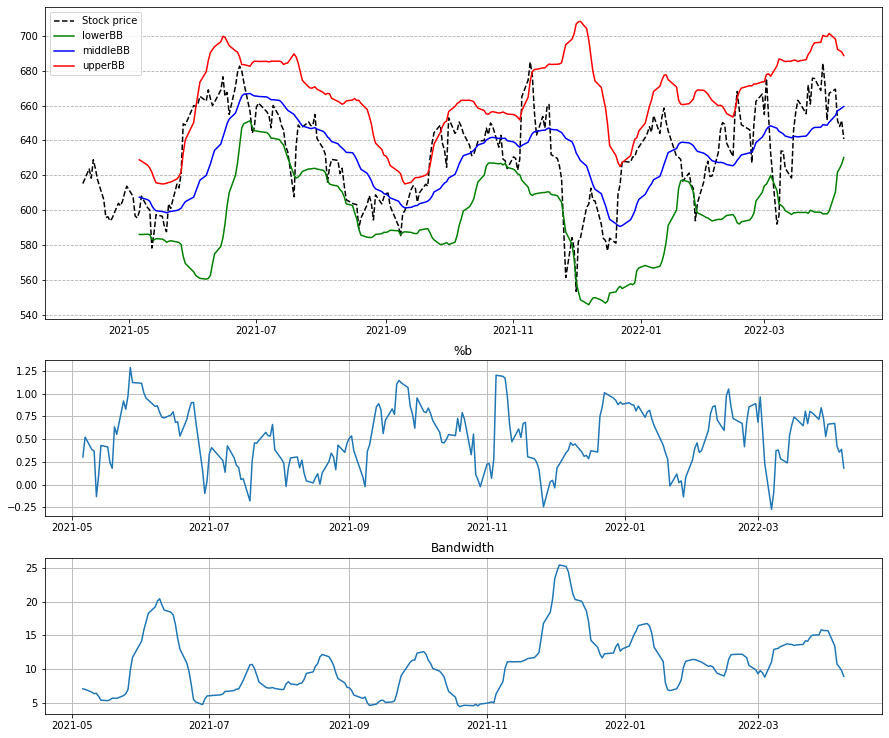

In [241]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,13), gridspec_kw={'height_ratios': [2, 1, 1]})
ax1.plot(stock_price.Close, ls='--', c='k', label='Stock price')
ax1.plot(stock_price['BBL_20_2.0'], c='g', label = 'lowerBB')
ax1.plot(stock_price['BBM_20_2.0'], c='b', label = 'middleBB')
ax1.plot(stock_price['BBU_20_2.0'], c='r', label = 'upperBB')
ax1.legend(loc='upper left')
ax2.plot(stock_price['BBP_20_2.0'])
ax3.plot(stock_price['BBB_20_2.0'])
ax1.grid(axis='y', ls='--')
ax2.grid()
ax2.set_title('%b')
ax3.grid()
ax3.set_title('Bandwidth')
plt.show()

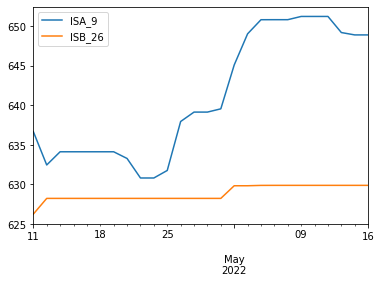

In [183]:
ichi_now, ichi_fut = ta.ichimoku(high=stock_price.High,low=stock_price.Low,close=stock_price.Close)
ichi_fut.plot()

In [184]:
help(ta.ichimoku)

Help on function ichimoku in module pandas_ta.overlap.ichimoku:

ichimoku(high, low, close, tenkan=None, kijun=None, senkou=None, include_chikou=True, offset=None, **kwargs)
    Ichimoku Kinkō Hyō (ichimoku)
    
    Developed Pre WWII as a forecasting model for financial markets.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/ichimoku-ich/
    
    Calculation:
        Default Inputs:
            tenkan=9, kijun=26, senkou=52
        MIDPRICE = Midprice
        TENKAN_SEN = MIDPRICE(high, low, close, length=tenkan)
        KIJUN_SEN = MIDPRICE(high, low, close, length=kijun)
        CHIKOU_SPAN = close.shift(-kijun)
    
        SPAN_A = 0.5 * (TENKAN_SEN + KIJUN_SEN)
        SPAN_A = SPAN_A.shift(kijun)
    
        SPAN_B = MIDPRICE(high, low, close, length=senkou)
        SPAN_B = SPAN_B.shift(kijun)
    
    Args:
        high (pd.Series): Series of 'high's
        low (pd.Series): Series of 'low's
        close (pd.Serie